Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn



# Division of labor ##

We did this entire project once again together with pair programming.
We got together (virtualy or in real life) and worked together, looking for solutions. Everyone did about a third of the work.


# Data preprocessing

Import the right libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

import warnings
warnings.filterwarnings('ignore')


Clone GitHub repository, so we can use the given images

In [2]:
!git clone https://github.com/tibovdc/ProjectML.git

fatal: destination path 'ProjectML' already exists and is not an empty directory.


Show 1 image from GitHub

In [3]:
 !pip install -q mediapy

10015215 - image0

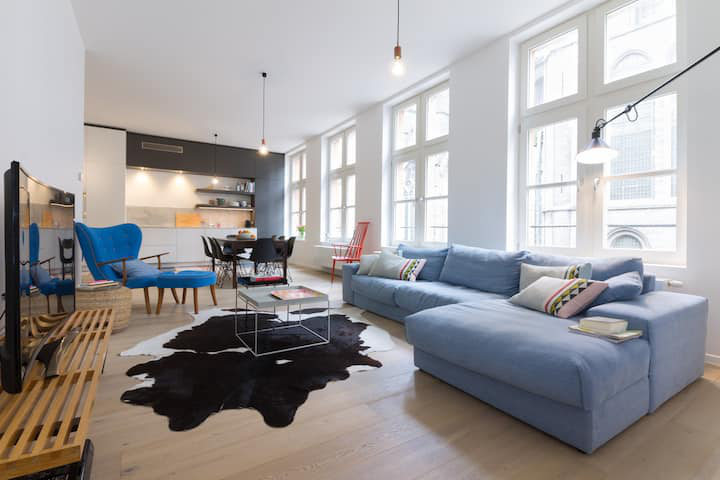

In [4]:
import mediapy as media

DATA_DIR = 'ProjectML/images/10015215/'  # Or any local path.
IMAGE = DATA_DIR + '0.jpg'

image2 = media.read_image(IMAGE)
media.show_image(image2, title='10015215 - image0')

In [ ]:
#!pip install os-sys


In [ ]:
# dictionary = {}
# import os
# rootdir = 'ProjectML/images'

# teller=0

# for subdir, dirs, files in os.walk(rootdir):
#   dictionary[subdir[17:-1]] = []
#   for file in files:
    
#     image = media.read_image(os.path.join(subdir, file))
#     dictionary[subdir[17:-1]].append(image)
#   teller = teller+1
#   if teller > 5:
#     break


erin


In [42]:
from PIL import Image
from numpy import asarray 

dictio = {}
import os
rootdir = 'ProjectML/images'

teller=0

for subdir, dirs, files in os.walk(rootdir):
  dictio[subdir[17:]] = []
  for file in files:
    # convert('L') => grayscale
    image = Image.open(os.path.join(subdir, file))#.convert('L')
    data = asarray(image)
    dictio[subdir[17:]].append(data)
  teller = teller+1
  if teller > 200:
    break


In [22]:
# for i, images in dictio.items():
#   for image in images:
#     print(image)
    



In [3]:
import timeit
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar100
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = cifar100.load_data()


In [4]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [5]:
metaData = unpickle('meta')

print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [10]:

print('x_train shape:', x_train.shape)#data
print('y_train shape:', y_train.shape)#label
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print(y_test)
#test = cifar100.load_batch();
#print(cifar100.fine_label[y_test[0][0]])


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunf

In [6]:
#normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
#we denken 100
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#batch size willekeurig getal, we're stealing it
batch_size = 128

In [8]:
import timeit
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10, cifar100
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [9]:
#build model functie
def build_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(100, activation='softmax'))
  return model

In [10]:
#wij gaan het met gpu doen, it's a thing
input_shape = x_train[0].shape

with tf.device('/gpu:0'):
    model = build_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.01), metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=2,
              verbose=1,
              validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print(score)

Epoch 1/2
391/391 [==============================] - 89s 225ms/step - loss: 4.6027 - accuracy: 0.0092 - val_loss: 4.5988 - val_accuracy: 0.0119
Epoch 2/2
391/391 [==============================] - 87s 222ms/step - loss: 4.5953 - accuracy: 0.0110 - val_loss: 4.5905 - val_accuracy: 0.0142
[4.590507984161377, 0.0142000000923872]


In [12]:
for x in dictio:
  print(x)


4176276
4553766
3338193
1825166
2122283
395189
1224263
3851696
4418030
4142986
3825864
834794
2253946
1454183
2120187
4190052
672247
2658604
2619575
921328
1210353
1152044
1915262
4265011
3612690
1980962
3943032
3266515
2664863
2440060
4323566
3476651
4265179
2330076
3526456
1955162
4386539
203117
3962401
1927939
5040796
3901951
4860985
1892083
1481508
1454153
2009664
1565406
2393566
3081204
3093057
1994144
1741651
2330043
1741635
3628560
2437639
2937007
4468175
2373053
2258183
4593235
1442013
3306126
3003316
3958121
4720990
4791837
135409
377154
1741599
4525045
459176
1509852
3606222
3934915
1383982
1388889
4648122
4304423
3699277
2383704
2049127
4345815
4772870
1210412
4574844
2791568
2436177
4352527
3881329
1591216
4570492
2119482
4952726
2609496
4408027
4530780
1964572
681053
2593929
4201376
3687320
4552265
876694
4046367
2993648
1193947
3928678
4510822
4121047
3651612
2406981
2232476
4622926
2516024
4862034
4210546
5047754
160789
351973
3831935
2322743
4282521
1991494
3905658
395

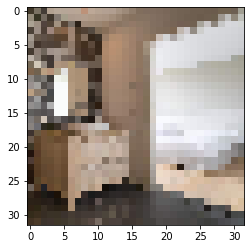

Predicted Result: 45
lobster


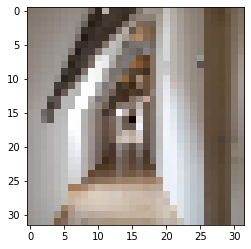

Predicted Result: 46
man


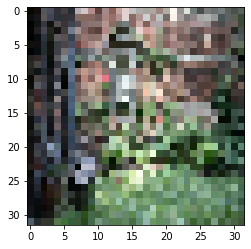

Predicted Result: 56
palm_tree


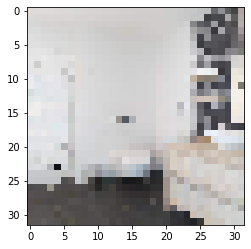

Predicted Result: 45
lobster


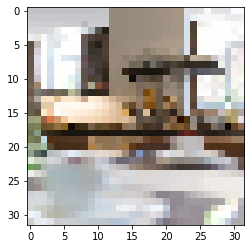

Predicted Result: 56
palm_tree


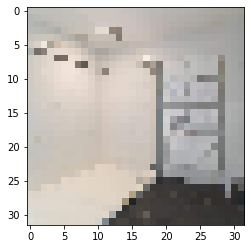

Predicted Result: 46
man


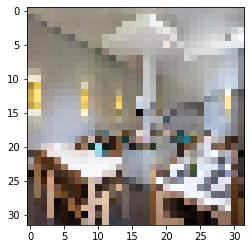

Predicted Result: 20
chair


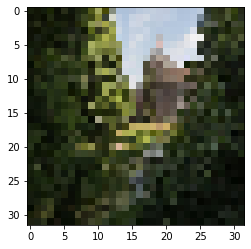

Predicted Result: 45
lobster


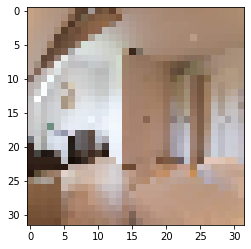

Predicted Result: 45
lobster


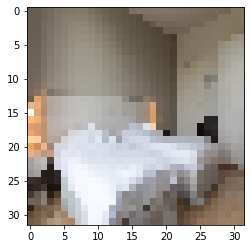

Predicted Result: 14
butterfly


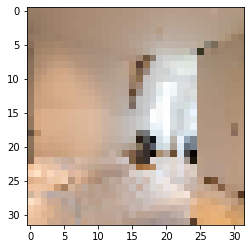

Predicted Result: 20
chair


In [17]:
import cv2

for x in dictio['4587517']:
  image = cv2.resize(x,(32,32))
  img = np.expand_dims(image,axis=0)
  prediction = model.predict(img)[0]

  plt.imshow((img[0]).astype(np.uint8))
  plt.show()


  print("Predicted Result:", np.argmax(prediction))
  print(metaData['fine_label_names'][np.argmax(prediction)])

# Kamers herkennen

In [18]:
#ja

#de bron
# https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20House%20room%20type%20Claasification.ipynb
!pip install -U monk-colab


     |████████████████████████████████| 515 kB 6.5 MB/s 
     |████████████████████████████████| 1.3 MB 43.0 MB/s 
     |████████████████████████████████| 356.7 MB 30 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=b0e2c074e0c87410bc45591daede06ae1dc55f696e4979a74ebb1070cb6e2cc8
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [19]:
from monk.gluon_prototype import prototype


In [20]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv" -O cls_house_scene_trained.zip && rm -rf /tmp/cookies.txt


--2021-12-09 10:27:32--  https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 142.250.141.113, 142.250.141.138, 142.250.141.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.21K  --.-KB/s    in 0s      

2021-12-09 10:27:33 (49.4 MB/s) - written to stdout [3286]

--2021-12-09 10:27:33--  https://docs.google.com/uc?export=download&confirm=hVs2&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 142.250.141.138, 142.250.141.113, 142.250.141.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8g-docs.googleusercontent.com/docs/securesc/abgks87i28iu8s3eemgc2ad091epjae4/r2

In [21]:
! unzip -qq cls_house_scene_trained.zip


In [22]:
ls workspace/Task


gluon_resnet18_v1/                   gluon-resnet18_v2/
gluon_resnet18_v1_train_all_layers/  gluon-resnet34_v1/


In [23]:
# Load project in inference mode

gtf = prototype(verbose=1);
gtf.Prototype("Task", "gluon_resnet18_v1_train_all_layers", eval_infer=True);

Mxnet Version: 1.8.0

Model Details
    Loading model - workspace/Task/gluon_resnet18_v1_train_all_layers/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gluon_resnet18_v1_train_all_layers
    Dir: /home/ubuntu/workspace/Task/gluon_resnet18_v1_train_all_layers/



Prediction
    Image name:         ProjectML/images/10015215/0.jpg
    Predicted class:      living_room
    Predicted score:      0.9866869449615479



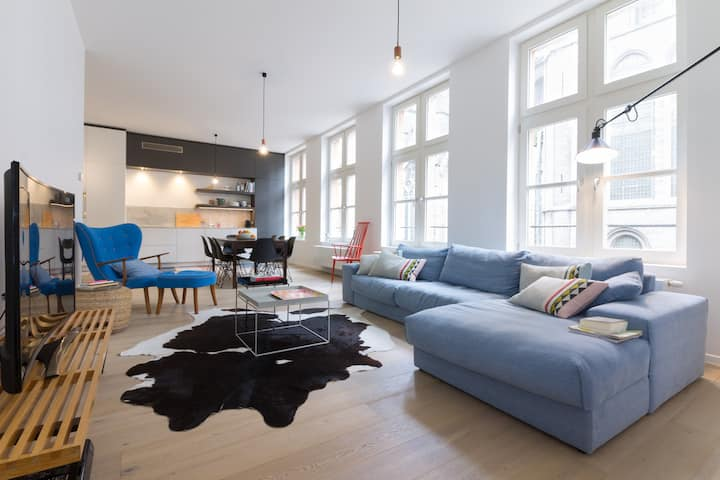

In [29]:
img_name = 'ProjectML/images/10015215/0.jpg'

predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name, height=300, width=300)

In [43]:
for x in dictio:
  print(x)


41762765
45537662
33381936
18251661
21222837
3951890
12242630
38516966
44180302
41429865
38258643
8347942
22539464
14541839
21201872
41900526
6722473
26586044
26195752
9213284
12103538
11520446
19152623
42650113
36126903
19809622
39430324
32665151
26648638
24400600
43235666
34766513
42651793
23300768
35264564
19551628
43865396
2031176
39624011
19279395
50407960
39019516
48609851
18920831
14815080
14541530
20096647
15654068
23935662
30812042
30930573
19941444
17416518
23300438
17416354
36285608
24376390
29370078
44681758
23730534
22581838
45932355
14420137
33061263
30033166
39581213
47209900
47918373
1354090
3771542
17415990
45250457
4591763
15098520
36062226
39349156
13839827
13888897
46481223
43044239
36992778
23837044
20491275
43458159
47728709
12104123
45748440
27915686
24361777
43525279
38813297
15912167
45704924
21194829
49527262
26094960
44080279
45307802
19645720
6810537
25939297
42013763
36873204
45522653
8766948
40463672
29936489
11939475
39286787
45108222
41210475
36516126
2

Prediction
    Image name:         ProjectML/images/39787793/1.jpg
    Predicted class:      living_room
    Predicted score:      0.885674238204956



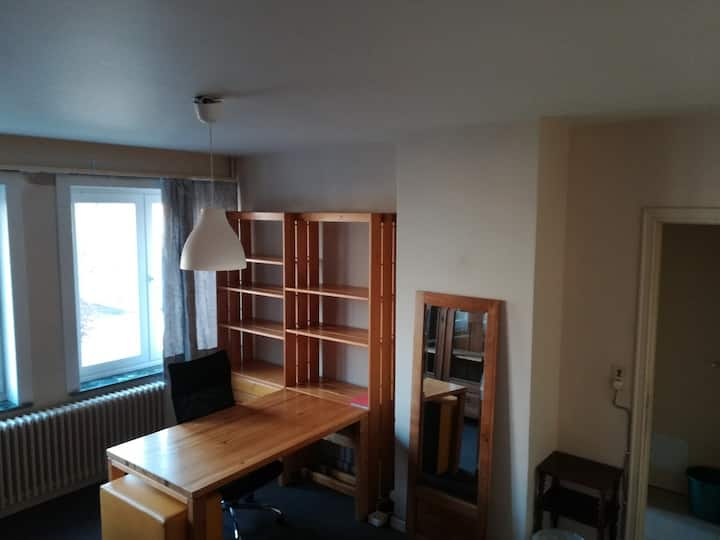

In [44]:
img_name = 'ProjectML/images/39787793/1.jpg'

predictions = gtf.Infer(img_name=img_name);
from IPython.display import Image
Image(filename=img_name, height=300, width=300)

Prediction
    Image name:         ProjectML/images/39787793/0.jpg
    Predicted class:      bedroom
    Predicted score:      0.723768413066864



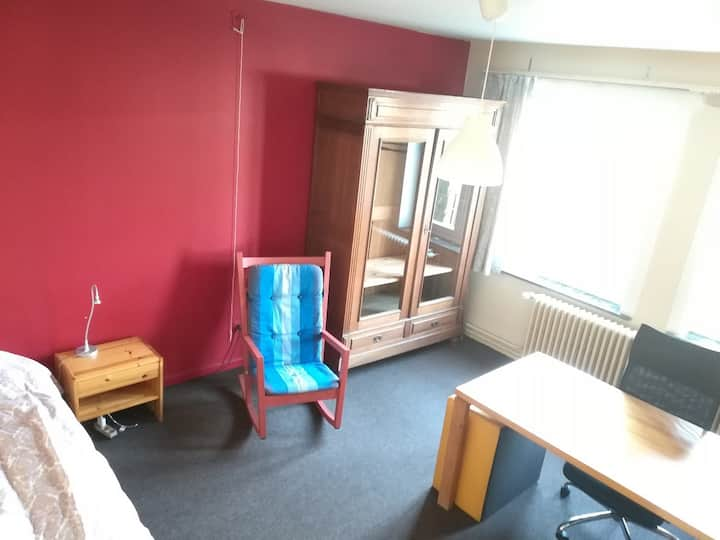

Prediction
    Image name:         ProjectML/images/39787793/1.jpg
    Predicted class:      living_room
    Predicted score:      0.885674238204956



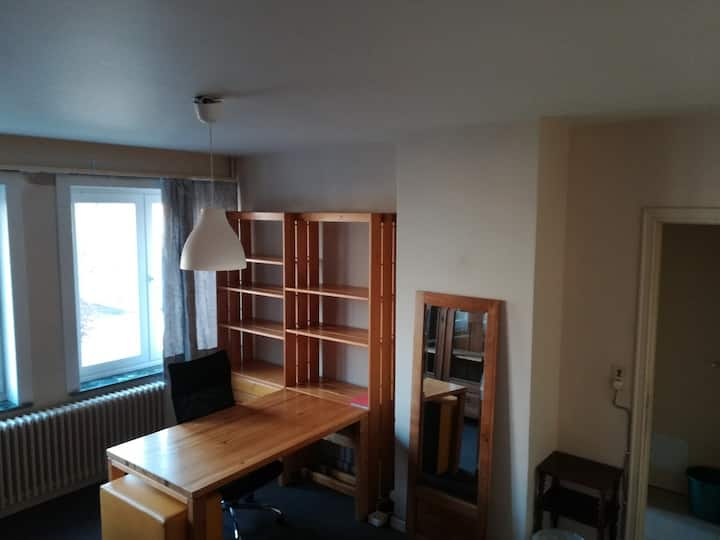

Prediction
    Image name:         ProjectML/images/39787793/2.jpg
    Predicted class:      dining_room
    Predicted score:      0.7838501334190369



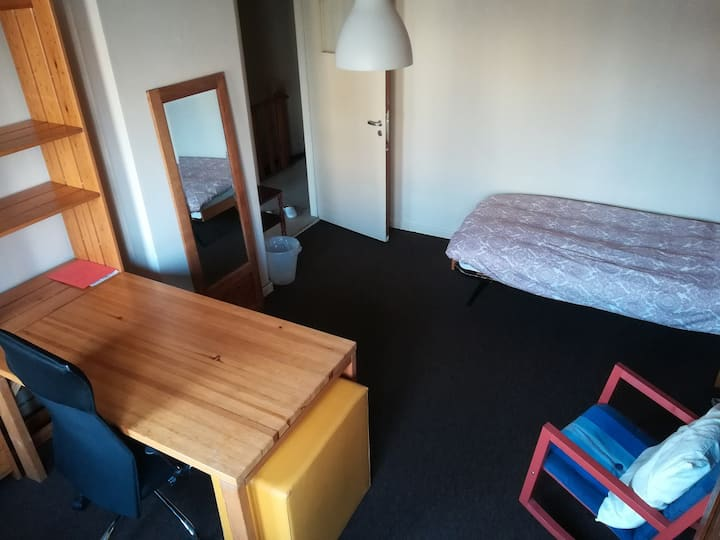

Prediction
    Image name:         ProjectML/images/39787793/3.jpg
    Predicted class:      bathroom
    Predicted score:      0.9999303817749023



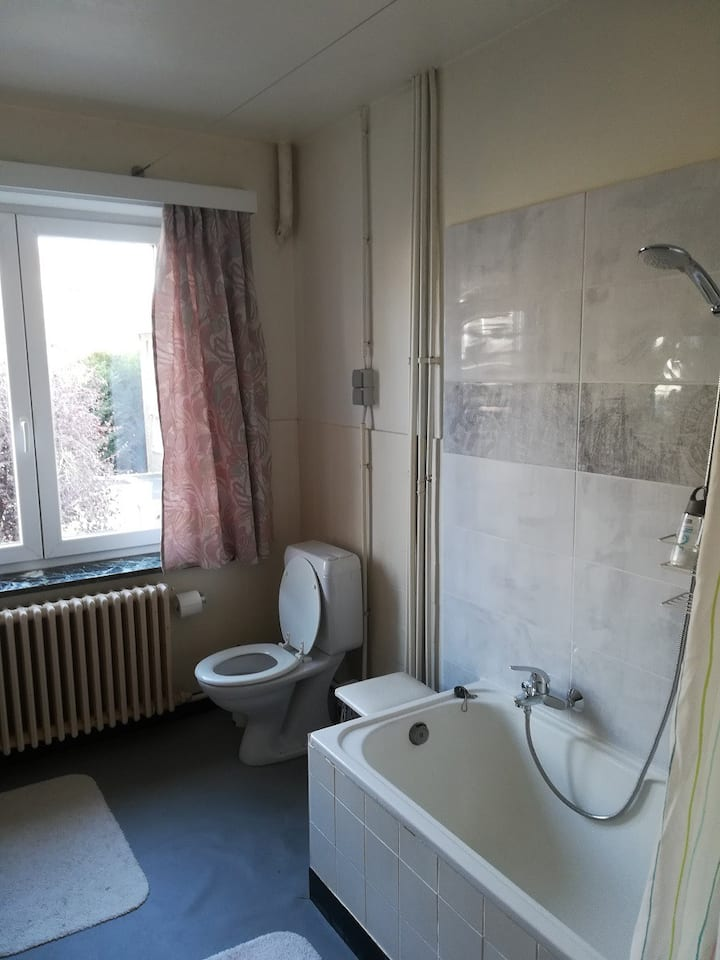

Prediction
    Image name:         ProjectML/images/39787793/4.jpg
    Predicted class:      bathroom
    Predicted score:      0.9999713897705078



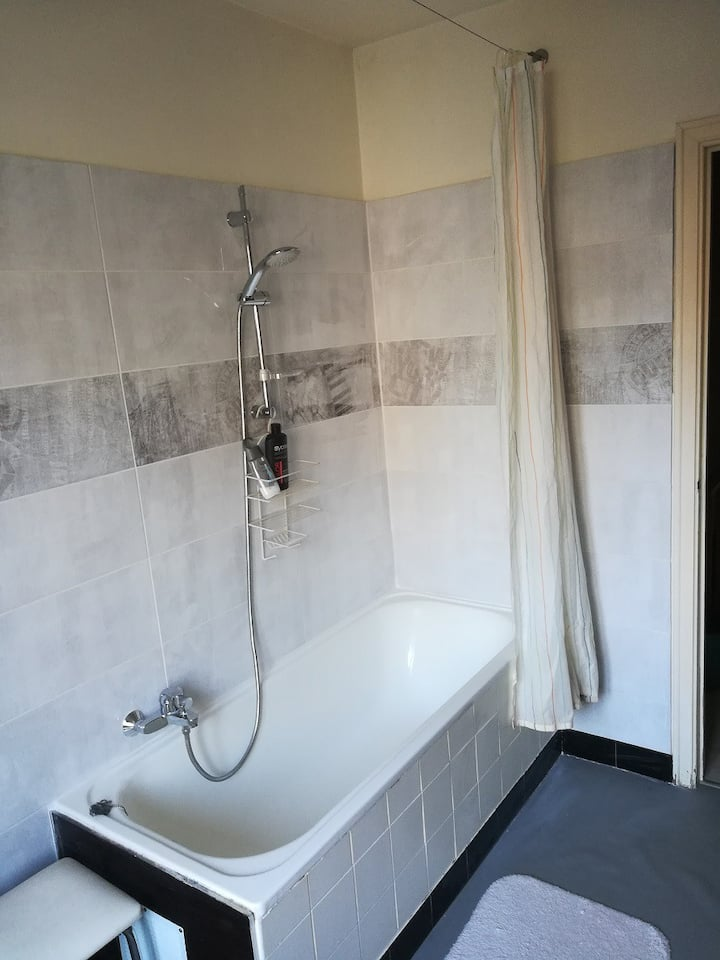

Prediction
    Image name:         ProjectML/images/39787793/5.jpg
    Predicted class:      kitchen
    Predicted score:      0.9653560519218445



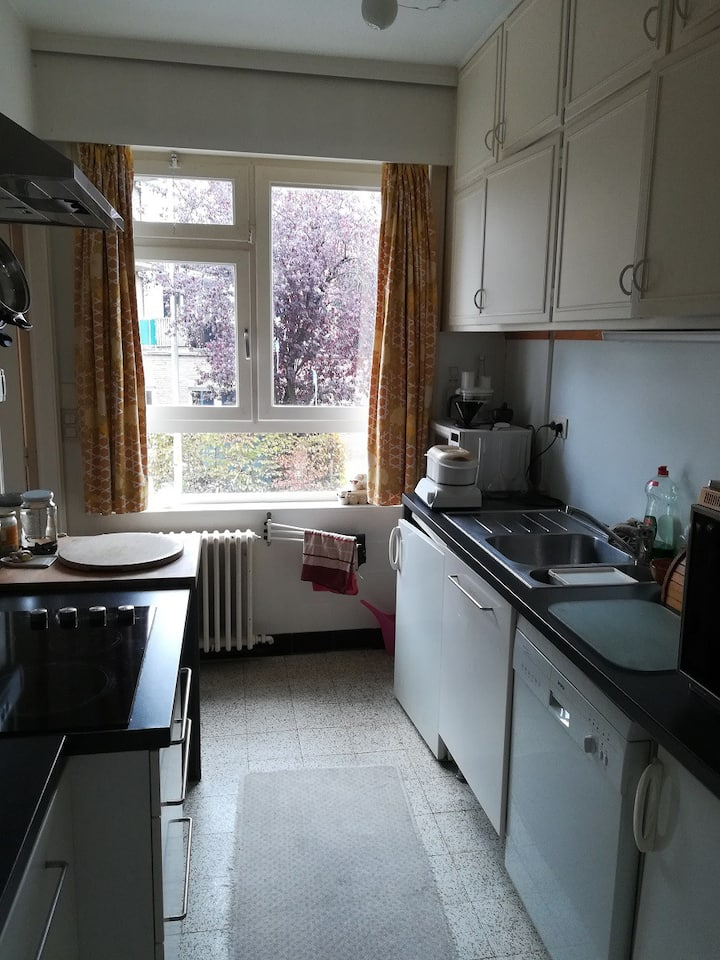

Prediction
    Image name:         ProjectML/images/39787793/6.jpg
    Predicted class:      bathroom
    Predicted score:      0.3798707127571106



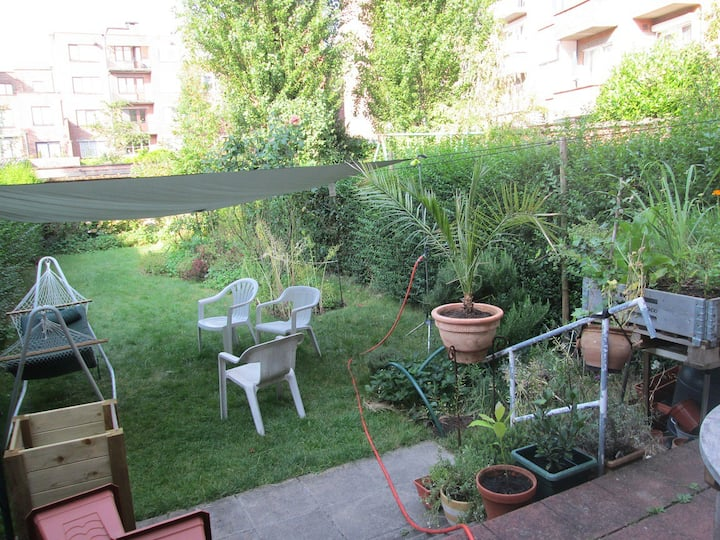

Prediction
    Image name:         ProjectML/images/39787793/7.jpg
    Predicted class:      dining_room
    Predicted score:      0.9536716938018799



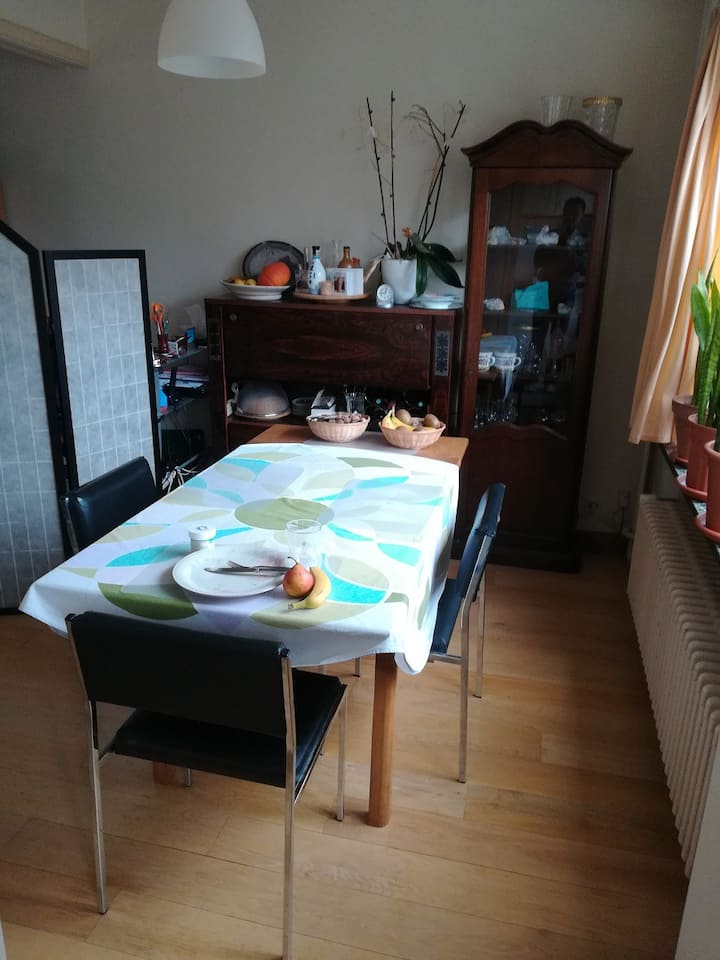

Prediction
    Image name:         ProjectML/images/39787793/8.jpg
    Predicted class:      Exterior
    Predicted score:      0.9988896250724792



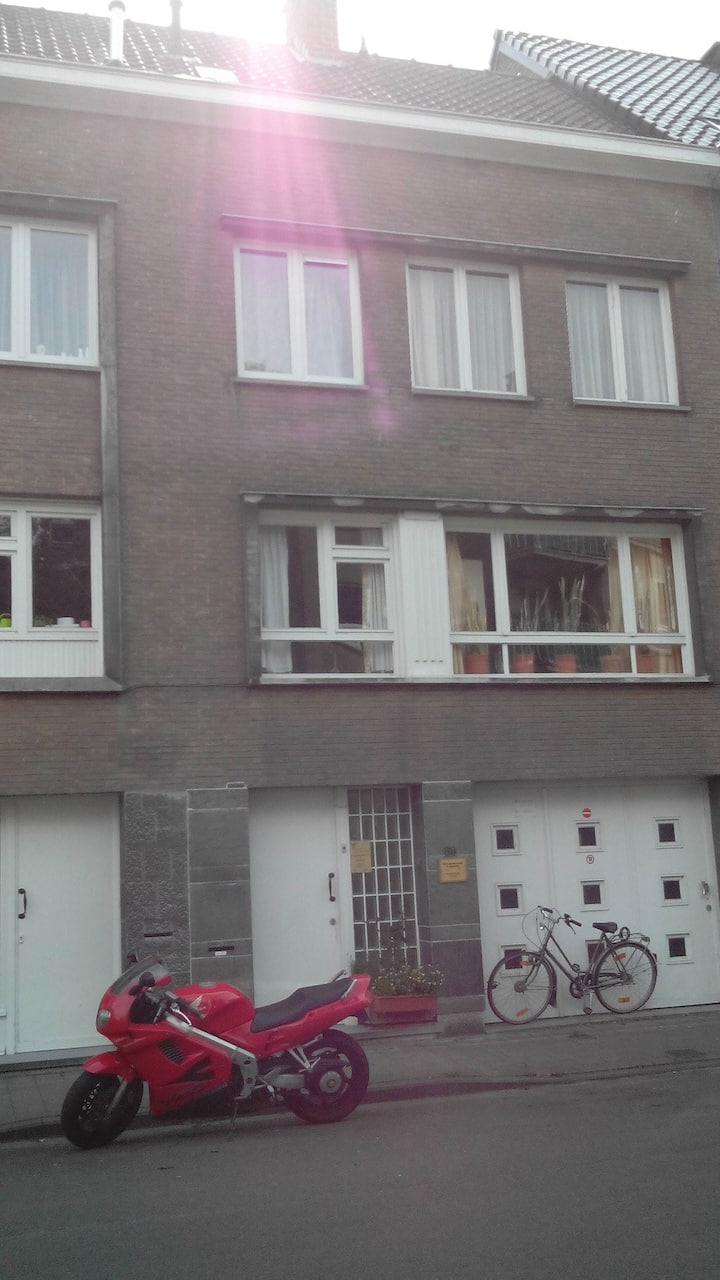

ConstraintError: ignored

In [45]:
from IPython.display import Image
for x in range(10):
  img_name = 'ProjectML/images/39787793/'+str(x)+'.jpg'

  predictions = gtf.Infer(img_name=img_name);
  display(Image(filename=img_name, height=300, width=300))